# Logistic Regression and Multi-layer Feed-forward Neural Network for Digit Recognition


## Dataset
The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset consists of handwritten grayscale digit images. All handwritten digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. A grayscale image is nothing but a 2D array of integers between 0 and 255. In the original dataset each pixel of the image is represented by a value between 0 and 255, where 0 is black, 255 is white and anything in between is a different shade of grey. Below is some examples of [MNIST](http://yann.lecun.com/exdb/mnist/) handwritten digits:

![MNIST](./mnist-samples.png)


## References

[2] https://pjreddie.com/projects/mnist-in-csv/

## Dataset Loading and Visualisation
The following function loads train and test handwritten digit image samples from [MNIST](https://pjreddie.com/projects/mnist-in-csv/) dataset.

In [2]:
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split#used for getting validation data from test data.sklearn method for splitting data
import numpy as np

In [3]:
def load_dataset(train_dataset='../data/mnist_train.csv', test_dataset='../data/mnist_test.csv'):
    """
    Loads and returns train and test datasets.
    """
    data_train = np.genfromtxt(fname=train_dataset, delimiter=',')
    y_train1 = data_train[:,0].astype(np.int)
    x_train1 = data_train[:,1:] / 255.0#method for normalizing pixel values
    #creating training and validation dataset using sklearn splitting method
    x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1, test_size=0.15, random_state=52)
    
    data_test = np.genfromtxt(fname=test_dataset, delimiter=',')
    y_test = data_test[:,0].astype(np.int)
    x_test = data_test[:,1:] / 255.0
    return (x_train, y_train, x_test, y_test,x_val,y_val)

The following script calls function `load_dataset()` to load our training, testing and validation datasets.

In [4]:
x_train, y_train, x_test, y_test,x_val,y_val = load_dataset()

In [5]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
m_val = x_val.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Number of validation examples: m_test = " + str(m_val))
#print ("Height/Width of each image: num_px = " + str(num_px))
#print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))
print ("x_val shape: " + str(x_val.shape))
print ("y_val shape: " + str(y_val.shape))

Number of training examples: m_train = 51000
Number of testing examples: m_test = 10000
Number of validation examples: m_test = 9000
x_train shape: (51000, 784)
y_train shape: (51000,)
x_test shape: (10000, 784)
y_test shape: (10000,)
x_val shape: (9000, 784)
y_val shape: (9000,)


In [6]:
 np.hstack((np.ones((x_train.shape[0],1)), x_train)).shape#function used to initialize weights in the learning function

(51000, 785)

The dimension of our grayscale images is 28*28 pixels....

Each row of `x_train`, `x_test` and 'x_val' variables is a 1D vector comprised of 784 (28 * 28) integers and refers to an unpacked handwritten digit image. 

The following function takes a 1D vector array as input and returns the corresponding 2D representation as image.

In [7]:
def vector2image(image_vector, image_height=28, image_width=28):
    """
    Returns image representation of the input 1D vector.
    """
    image = np.reshape(image_vector, (image_height, image_width))
    return image

In [8]:
vector2image(x_train[0])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now you can use `vector2image()` function to convert a 1D feature vector to 2D image for visualisation purposes, e.g.:

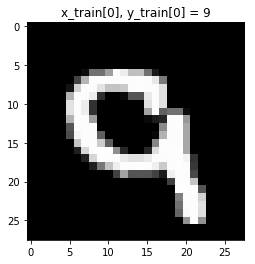

In [9]:
index = 0
image = vector2image(x_train[index])
pl.figure()
pl.imshow(image, cmap='gray')
pl.title('x_train[' + str(index) + '], ' + 'y_train[' + str(index) + '] = ' + str(y_train[index]))
pl.show()

You may also need the following function to convert a 2D grayscale image to 1D vector representation.

In [10]:
def image2vector(image):
    """
    Returns 1D vector representation of the input 2D image.
    """
    image_height, image_width = image.shape
    image_vector = np.reshape(image, image_height*image_width)
    return image_vector

In [11]:
x_train[0].shape

(784,)

In [12]:
image2vector(vector2image(x_train[0])).shape

(784,)

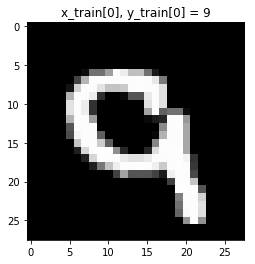

In [13]:
image = vector2image(image2vector(vector2image(x_train[index])))
pl.figure()
pl.imshow(image, cmap='gray')
pl.title('x_train[' + str(index) + '], ' + 'y_train[' + str(index) + '] = ' + str(y_train[index]))
pl.show()

In [14]:
y_train

array([9, 9, 5, ..., 8, 5, 0])

Now, let's produce an image that is similar to what you see on the very first markdown cell by selecting samples from `x_train` and `y_train`!

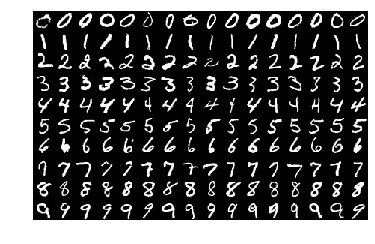

In [15]:
C = 10 # number of digits
R = 16 # images per row
for c in np.arange(C):
    for r in np.arange(R):
        image = vector2image(x_train[y_train==c][r])
        if r == 0:
            image_digits_row = image
        else:
            image_digits_row = np.hstack((image_digits_row, image))
    if c == 0:
        image_digits = image_digits_row
    else:
        image_digits = np.vstack((image_digits, image_digits_row))
pl.figure()
pl.imshow(image_digits, cmap='gray')
pl.axis("off")
# save a copy of this image as png file under ./images folder
pl.imsave('./mnist-samples.png', image_digits, cmap='gray') 

We are ready to implement LR classifier for digit recognition.

## Logistic Regression

In [16]:
np.random.randn(3, 4).shape

(3, 4)

In [17]:
class LR:
    def __init__(self):
        pass
    
    def parameters(self):
        return self.W
                
    def activation(self, s):
        return 1.0 / (1 + np.exp(-s)) # sigmoid function as activation function
    
    def feedforward(self, X): # output of the logistic regression
        S = np.dot(X, self.W)
        U = self.activation(S)
        return U
        
    def learn(self, X, Y, learning_rate=0.99, delta=1e-6, epoch_max=5000, seed=7):
        self.learning_rate = learning_rate
        self.delta = delta
        self.epoch_max = epoch_max
        self.seed = seed
        np.random.seed(seed)
        
        X = np.hstack((np.ones((X.shape[0],1)), X))
        d = X.shape[1]
        C =  len(np.unique(Y))
        self.W = np.random.randn(d, C) * 0.01
        N = X.shape[0]
        Y_one_hot = np.zeros((N, C))#matrix N ROWS C COLUMNS
        Y_one_hot[np.arange(N), Y] = 1.0
        converged = False
        epoch = 1
        while not converged:
            U = self.feedforward(X)
            E = (U - Y_one_hot)#ERROR
            D = U * (1-U) * E
            MSE = 1.0 / (2 * N) * np.sum(np.sum(E**2, axis=1))
            if (epoch%100) == 0:
                ACC = self.accuracy(X, Y, True)
                print('epoch = {0}, MSE = {1:.3f}, TRAIN ACC = {2:.3f}'.format(epoch, MSE, ACC))
            W_ = self.W.copy()
            self.W = self.W - self.learning_rate * 1.0/N * np.dot(X.T, D)
            epoch += 1
            if (np.max(np.abs(W_ - self.W)) <= self.delta) or (epoch >=self.epoch_max):
                converged = True        
        
    def classify(self, X, augmented=False):
        if not augmented:
            X = np.hstack((np.ones((X.shape[0],1)), X))
        U = self.feedforward(X)
        L = np.argmax(U, axis=1)            
        return L
    
    def accuracy(self, X, Y, augmented=False):
        N = X.shape[0]
        L = self.classify(X, augmented)
        acc = np.sum(L == Y) / N
        return acc
    
    def confusion_matrix(self, X, Y):
        P = lr.classify(X)
        labels = np.unique(Y)
        CM = np.zeros((len(labels), len(labels)), dtype=np.int)
        for y, p in zip(Y, P):
            CM[y,p] = CM[y,p] + 1
        return CM        

### Train Logistic Regression

In [18]:
lr = LR()
lr.learn(x_train, y_train, 0.99)

epoch = 100, MSE = 0.156, TRAIN ACC = 0.864
epoch = 200, MSE = 0.131, TRAIN ACC = 0.879
epoch = 300, MSE = 0.120, TRAIN ACC = 0.887
epoch = 400, MSE = 0.114, TRAIN ACC = 0.891
epoch = 500, MSE = 0.109, TRAIN ACC = 0.894
epoch = 600, MSE = 0.106, TRAIN ACC = 0.896
epoch = 700, MSE = 0.103, TRAIN ACC = 0.898
epoch = 800, MSE = 0.101, TRAIN ACC = 0.900
epoch = 900, MSE = 0.099, TRAIN ACC = 0.901
epoch = 1000, MSE = 0.098, TRAIN ACC = 0.903
epoch = 1100, MSE = 0.097, TRAIN ACC = 0.904
epoch = 1200, MSE = 0.095, TRAIN ACC = 0.905
epoch = 1300, MSE = 0.094, TRAIN ACC = 0.905
epoch = 1400, MSE = 0.093, TRAIN ACC = 0.906
epoch = 1500, MSE = 0.092, TRAIN ACC = 0.907
epoch = 1600, MSE = 0.092, TRAIN ACC = 0.908
epoch = 1700, MSE = 0.091, TRAIN ACC = 0.908
epoch = 1800, MSE = 0.090, TRAIN ACC = 0.909
epoch = 1900, MSE = 0.090, TRAIN ACC = 0.909
epoch = 2000, MSE = 0.089, TRAIN ACC = 0.910
epoch = 2100, MSE = 0.089, TRAIN ACC = 0.910
epoch = 2200, MSE = 0.088, TRAIN ACC = 0.911
epoch = 2300, MSE =

### Test Accuracy of the Trained Logistic Regression

In [39]:
print('TEST ACC = {0:.3f}'.format(lr.accuracy(x_test, y_test)))

TEST ACC = 0.918


In [40]:
print('VAL ACC = {0:.3f}'.format(lr.accuracy(x_val, y_val)))

VAL ACC = 0.907


In [42]:
print('TRAIN ACC ={0:.3f}'.format(lr.accuracy(x_train, y_train)))

TRAIN ACC =0.917


### Sample Digit Classification Results

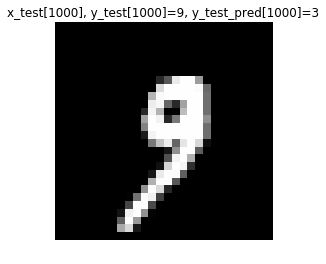

In [31]:
index = 1000
image_test = vector2image(x_test[index])
image_test_label = y_test[index]
image_test_label_predicted = lr.classify(x_test[index][np.newaxis, :])[0]
pl.figure()
pl.imshow(image_test, cmap='gray')
pl.axis('off')
pl.title('x_test[{0}], y_test[{0}]={1}, y_test_pred[{0}]={2}'.format(index, image_test_label, image_test_label_predicted))
pl.show()

### Confusion Matrix

In [34]:
print(lr.confusion_matrix(x_train,y_train))

[[4930    0    6    7    7   10   34    4   44    3]
 [   2 5586   31   13    5   27    9   12   64    7]
 [  42   33 4534   56   77   18   60   88  123   21]
 [  30   15  132 4586    8  150   31   53  111   55]
 [  22   26   25    5 4549    2   47    7   49  172]
 [  78   24   42  152   70 3952   90   28  137   56]
 [  32   15   32    3   20   65 4830    7   41    3]
 [  21   40   66   14   62   11    5 4974   21  120]
 [  54  103   57   97   38  139   41   17 4391   62]
 [  50   27   19   82  179   36    5  153   57 4454]]


In [35]:
print(lr.confusion_matrix(x_test, y_test))

[[ 964    0    0    2    0    2    8    1    3    0]
 [   0 1104    3    4    0    2    5    2   15    0]
 [   8    1  930   11   11    3   12   15   36    5]
 [   3    0   24  922    2   19    4    9   18    9]
 [   3    2    6    0  908    0   11    2   10   40]
 [  13    2    3   33   12  763   19    7   32    8]
 [  11    3    4    2    7   13  910    1    7    0]
 [   2    9   24    5    8    1    1  946    2   30]
 [  11    5   10   17   15   25   11   14  860    6]
 [  10    6    2   14   53   10    0   26   16  872]]


In [24]:
print(lr.confusion_matrix(x_val, y_val))

[[848   0   3   0   3   2   7   2  12   1]
 [  0 953   9   5   0   7   3   3   5   1]
 [ 11   4 804  11  16   1  10  17  25   7]
 [  9   4  24 841   1  29   7  11  22  12]
 [  3   2   7   1 860   0   7   2  13  43]
 [ 22   6   4  19  15 670  21   2  28   5]
 [  7   3   7   0   4  10 833   0   6   0]
 [  5   3   5   3  13   0   0 864   2  36]
 [  6  25  15  26   9  27   4   2 730   8]
 [ 10   2   6  25  38   8   0  25  13 760]]


In [46]:
class MFNN:
    def __init__(self, num_nodes, seed=7):
        self.num_nodes = num_nodes
        self.seed = seed
        self.create_network()
        
    def create_network(self):
        np.random.seed(self.seed)
        self.Wrandom = []        
        for n in np.arange(len(self.num_nodes)-1):
            Wr = np.random.randn(self.num_nodes[n], self.num_nodes[n+1])
            Wr = Wr - np.mean(Wr, axis=0)
            Wr = Wr / np.var(Wr, axis=0)
            self.Wrandom.append(Wr)
            
    def augment_data(self, X):
        s = X.copy()
        for Wr in self.Wrandom:
            s = np.dot(s, Wr)
            u = self.activation(s)
        u = np.hstack((np.ones((u.shape[0],1)), u))
        return u            
    
    def parameters(self):
        return self.W
                
    def activation(self, s):
        return 1.0 / (1 + np.exp(-s)) # sigmoid function as activation function
    
    def feedforward(self, X): # output of the logistic regression
        S = np.dot(X, self.W)
        U = self.activation(S)
        return U
        
    def learn(self, X, Y, learning_rate=0.66, delta=1e-6, epoch_max=5000, seed=7):
        self.learning_rate = learning_rate
        self.delta = delta
        self.epoch_max = epoch_max
        self.seed = seed
        np.random.seed(seed)
        X = self.augment_data(X)
        d = X.shape[1]
        C =  len(np.unique(Y))
        self.W = np.random.randn(d, C) * 0.01
        N = X.shape[0]
        Y_one_hot = np.zeros((N, C))
        Y_one_hot[np.arange(N), Y] = 1.0
        converged = False
        epoch = 1
        while not converged:
            U = self.feedforward(X)
            E = (U - Y_one_hot)
            D = U * (1-U) * E
            MSE = 1.0 / (2 * N) * np.sum(np.sum(E**2, axis=1))
            if (epoch%20) == 0:
                ACC = self.accuracy(X, Y, True)
                print('epoch = {0}, MSE = {1:.3f}, TRAIN ACC = {2:.3f}'.format(epoch, MSE, ACC))
            W_ = self.W.copy()
            self.W = self.W - self.learning_rate * 1.0/N * np.dot(X.T, D)
            epoch += 1
            if (np.max(np.abs(W_ - self.W)) <= self.delta) or (epoch >=self.epoch_max):
                converged = True        
        
    def classify(self, X, augmented=False):
        if not augmented:
            X = self.augment_data(X)
        U = self.feedforward(X)
        L = np.argmax(U, axis=1)            
        return L
    
    def accuracy(self, X, Y, augmented=False):
        N = X.shape[0]
        L = self.classify(X, augmented)
        acc = np.sum(L == Y) / N
        return acc
    
    def confusion_matrix(self, X, Y):
        P = lr.classify(X)
        labels = np.unique(Y)
        CM = np.zeros((len(labels), len(labels)), dtype=np.int)
        for y, p in zip(Y, P):
            CM[y,p] = CM[y,p] + 1
        return CM        

In [47]:
num_nodes = [x_train.shape[1], np.int(2 * x_train.shape[1])]
mfnn = MFNN(num_nodes)
mfnn.learn(x_train, y_train, 0.1)

epoch = 20, MSE = 0.417, TRAIN ACC = 0.254
epoch = 40, MSE = 0.312, TRAIN ACC = 0.676
epoch = 60, MSE = 0.252, TRAIN ACC = 0.771
epoch = 80, MSE = 0.217, TRAIN ACC = 0.815
epoch = 100, MSE = 0.195, TRAIN ACC = 0.835
epoch = 120, MSE = 0.180, TRAIN ACC = 0.846
epoch = 140, MSE = 0.169, TRAIN ACC = 0.854
epoch = 160, MSE = 0.160, TRAIN ACC = 0.860
epoch = 180, MSE = 0.153, TRAIN ACC = 0.865
epoch = 200, MSE = 0.148, TRAIN ACC = 0.869
epoch = 220, MSE = 0.143, TRAIN ACC = 0.872
epoch = 240, MSE = 0.139, TRAIN ACC = 0.875
epoch = 260, MSE = 0.135, TRAIN ACC = 0.877
epoch = 280, MSE = 0.132, TRAIN ACC = 0.879
epoch = 300, MSE = 0.129, TRAIN ACC = 0.881
epoch = 320, MSE = 0.127, TRAIN ACC = 0.883
epoch = 340, MSE = 0.124, TRAIN ACC = 0.885
epoch = 360, MSE = 0.122, TRAIN ACC = 0.886
epoch = 380, MSE = 0.120, TRAIN ACC = 0.888
epoch = 400, MSE = 0.119, TRAIN ACC = 0.889
epoch = 420, MSE = 0.117, TRAIN ACC = 0.890
epoch = 440, MSE = 0.116, TRAIN ACC = 0.891
epoch = 460, MSE = 0.114, TRAIN ACC 

epoch = 3700, MSE = 0.069, TRAIN ACC = 0.931
epoch = 3720, MSE = 0.069, TRAIN ACC = 0.931
epoch = 3740, MSE = 0.069, TRAIN ACC = 0.931
epoch = 3760, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3780, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3800, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3820, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3840, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3860, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3880, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3900, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3920, MSE = 0.069, TRAIN ACC = 0.932
epoch = 3940, MSE = 0.068, TRAIN ACC = 0.932
epoch = 3960, MSE = 0.068, TRAIN ACC = 0.932
epoch = 3980, MSE = 0.068, TRAIN ACC = 0.932
epoch = 4000, MSE = 0.068, TRAIN ACC = 0.932
epoch = 4020, MSE = 0.068, TRAIN ACC = 0.932
epoch = 4040, MSE = 0.068, TRAIN ACC = 0.932
epoch = 4060, MSE = 0.068, TRAIN ACC = 0.933
epoch = 4080, MSE = 0.068, TRAIN ACC = 0.933
epoch = 4100, MSE = 0.068, TRAIN ACC = 0.933
epoch = 4120, MSE = 0.068, TRAIN ACC = 0.933
epoch = 41

In [48]:
print('TEST ACC = {0:.3f}'.format(mfnn.accuracy(x_test, y_test)))

TEST ACC = 0.933


In [49]:
print('TRAIN ACC = {0:.3f}'.format(mfnn.accuracy(x_train, y_train)))

TRAIN ACC = 0.936


In [50]:
print('VAL ACC = {0:.3f}'.format(mfnn.accuracy(x_val, y_val)))

VAL ACC = 0.928


In [51]:
print(mfnn.confusion_matrix(x_test, y_test))

[[ 964    0    0    2    0    2    8    1    3    0]
 [   0 1104    3    4    0    2    5    2   15    0]
 [   8    1  930   11   11    3   12   15   36    5]
 [   3    0   24  922    2   19    4    9   18    9]
 [   3    2    6    0  908    0   11    2   10   40]
 [  13    2    3   33   12  763   19    7   32    8]
 [  11    3    4    2    7   13  910    1    7    0]
 [   2    9   24    5    8    1    1  946    2   30]
 [  11    5   10   17   15   25   11   14  860    6]
 [  10    6    2   14   53   10    0   26   16  872]]


In [52]:
print(mfnn.confusion_matrix(x_train, y_train))

[[4930    0    6    7    7   10   34    4   44    3]
 [   2 5586   31   13    5   27    9   12   64    7]
 [  42   33 4534   56   77   18   60   88  123   21]
 [  30   15  132 4586    8  150   31   53  111   55]
 [  22   26   25    5 4549    2   47    7   49  172]
 [  78   24   42  152   70 3952   90   28  137   56]
 [  32   15   32    3   20   65 4830    7   41    3]
 [  21   40   66   14   62   11    5 4974   21  120]
 [  54  103   57   97   38  139   41   17 4391   62]
 [  50   27   19   82  179   36    5  153   57 4454]]


In [53]:
print(mfnn.confusion_matrix(x_val, y_val))

[[848   0   3   0   3   2   7   2  12   1]
 [  0 953   9   5   0   7   3   3   5   1]
 [ 11   4 804  11  16   1  10  17  25   7]
 [  9   4  24 841   1  29   7  11  22  12]
 [  3   2   7   1 860   0   7   2  13  43]
 [ 22   6   4  19  15 670  21   2  28   5]
 [  7   3   7   0   4  10 833   0   6   0]
 [  5   3   5   3  13   0   0 864   2  36]
 [  6  25  15  26   9  27   4   2 730   8]
 [ 10   2   6  25  38   8   0  25  13 760]]
